In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


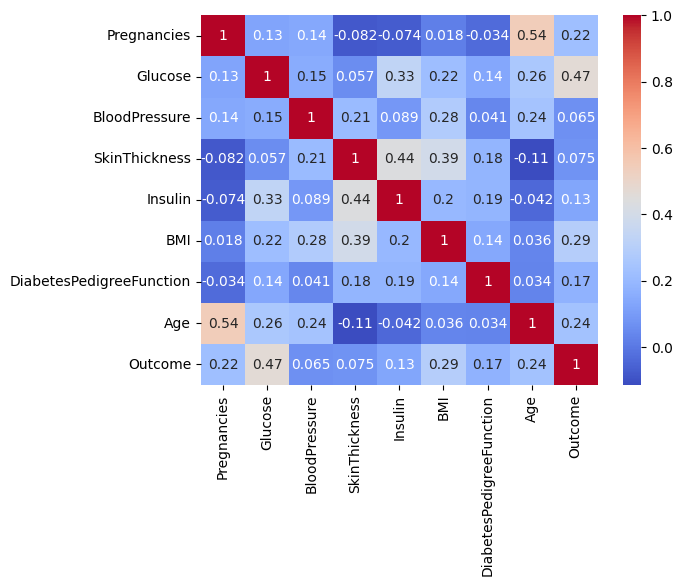

In [7]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [8]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
for col in cols_with_zero:
    zero_count = (df[col] == 0).sum()
    print(f'{col}: {zero_count} value = 0')

Glucose: 5 value = 0
BloodPressure: 35 value = 0
SkinThickness: 227 value = 0
Insulin: 374 value = 0
BMI: 11 value = 0


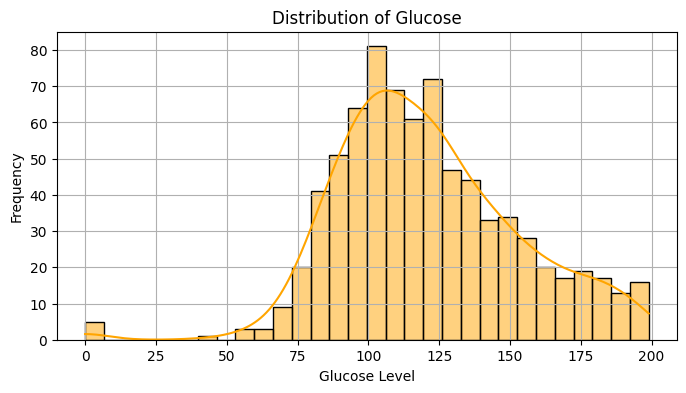

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Glucose'], bins=30, kde=True, color='orange')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)

In [20]:
df.loc[df['Outcome'] == 0, 'Glucose'] = df.loc[df['Outcome'] == 0, 'Glucose'].fillna(df.loc[df['Outcome'] == 0, 'Glucose'].median())
df.loc[df['Outcome'] == 1, 'Glucose'] = df.loc[df['Outcome'] == 1, 'Glucose'].fillna(df.loc[df['Outcome'] == 1, 'Glucose'].median())

In [21]:
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)

In [22]:
df.loc[df['Outcome'] == 0, 'BloodPressure'] = df.loc[df['Outcome'] == 0, 'BloodPressure'].fillna(df.loc[df['Outcome'] == 0, 'BloodPressure'].median())
df.loc[df['Outcome'] == 1, 'BloodPressure'] = df.loc[df['Outcome'] == 1, 'BloodPressure'].fillna(df.loc[df['Outcome'] == 1, 'BloodPressure'].median())

In [23]:
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)

In [24]:
df.loc[df['Outcome'] == 0, 'SkinThickness'] = df.loc[df['Outcome'] == 0, 'SkinThickness'].fillna(df.loc[df['Outcome'] == 0, 'SkinThickness'].median())
df.loc[df['Outcome'] == 1, 'SkinThickness'] = df.loc[df['Outcome'] == 1, 'SkinThickness'].fillna(df.loc[df['Outcome'] == 1, 'SkinThickness'].median())

In [25]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)

In [27]:
df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].fillna(df.loc[df['Outcome'] == 0, 'Insulin'].median())
df.loc[df['Outcome'] == 1, 'Insulin'] = df.loc[df['Outcome'] == 1, 'Insulin'].fillna(df.loc[df['Outcome'] == 1, 'Insulin'].median())

In [28]:
df['BMI'] = df['BMI'].replace(0, np.nan)

In [29]:
df.loc[df['Outcome'] == 0, 'BMI'] = df.loc[df['Outcome'] == 0, 'BMI'].fillna(df.loc[df['Outcome'] == 0, 'BMI'].median())
df.loc[df['Outcome'] == 1, 'BMI'] = df.loc[df['Outcome'] == 1, 'BMI'].fillna(df.loc[df['Outcome'] == 1, 'BMI'].median())

In [30]:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597402597402597

Confusion Matrix:
 [[80 19]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    median_diabetic = df[df['Outcome'] == 1][col].median()
    median_nondiabetic = df[df['Outcome'] == 0][col].median()
    df.loc[(df['Outcome'] == 1) & (df[col].isna()), col] = median_diabetic
    df.loc[(df['Outcome'] == 0) & (df[col].isna()), col] = median_nondiabetic


In [45]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
k_range = range(1, 31)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

best_k = k_range[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"Best K = {best_k} with accuracy = {best_accuracy:.4f}")


Best K = 14 with accuracy = 0.8377


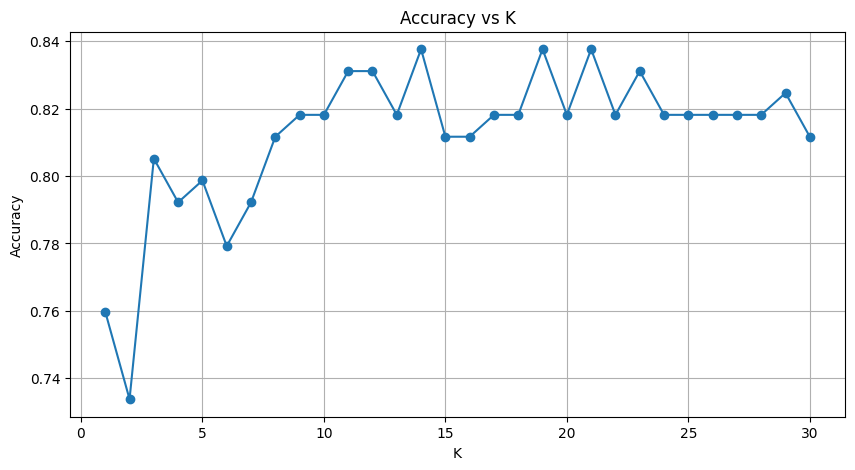

In [48]:
plt.figure(figsize=(10,5))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [49]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=14)

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        99
           1       0.81      0.71      0.76        55

    accuracy                           0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.83       154



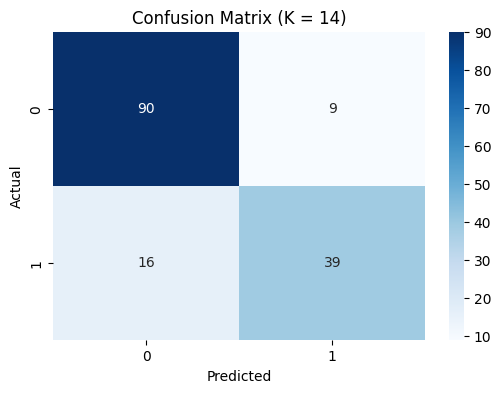

In [51]:
y_pred = best_knn.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (K = {best_k})')
plt.show()


In [52]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_model", SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=101))
])

In [54]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_model', SVC(class_weight='balanced', random_state=101))])

In [55]:
y_pred_test = svm_pipeline.predict(X_test)
y_pred_train = svm_pipeline.predict(X_train)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_test))
print("Accuracy on Train Set:", accuracy_score(y_train, y_pred_train))

Accuracy on Test Set: 0.7857142857142857
Accuracy on Train Set: 0.8941368078175895



Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        99
           1       0.65      0.85      0.74        55

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.79       154


Confusion Matrix (Test Set):


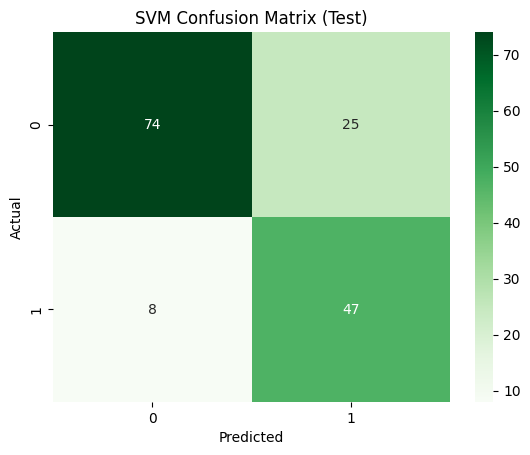

In [56]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix (Test)')
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
eval_metric(best_model, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Accuracy: 0.996742671009772

Confusion Matrix:
 [[400   1]
 [  1 212]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Testing Set Evaluation:
Accuracy: 0.8571428571428571

Confusion Matrix:
 [[86 13]
 [ 9 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [63]:
operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(class_weight = "balanced", random_state=101))]

rf_model = Pipeline(steps=operations)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [64]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [65]:
y_pred_proba = rf_model.predict_proba(X_test)

In [66]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
208,1,96.0,64.0,27.0,87.0,33.2,0.289,21,0,0,0.00
174,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0,0,0.07
714,3,102.0,74.0,27.0,102.5,29.5,0.121,32,0,0,0.04
581,6,109.0,60.0,27.0,102.5,25.0,0.206,27,0,0,0.01
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0,0,0.00
456,1,135.0,54.0,27.0,102.5,26.7,0.687,62,0,0,0.04
725,4,112.0,78.0,40.0,102.5,39.4,0.236,38,0,0,0.04
331,2,87.0,58.0,16.0,52.0,32.7,0.166,25,0,0,0.04
548,1,164.0,82.0,43.0,67.0,32.8,0.341,50,0,0,0.46
425,4,184.0,78.0,39.0,277.0,37.0,0.264,31,1,1,0.82


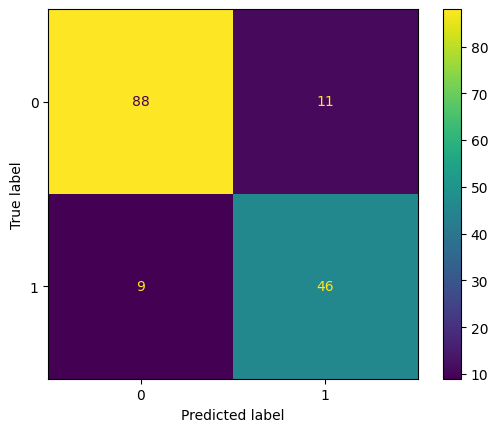

In [69]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test);

In [70]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))

In [71]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[88 11]
 [ 9 46]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        99
           1       0.81      0.84      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154


Train_Set
[[401   0]
 [  0 213]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Train Accuracy: 1.0
Test Accuracy: 0.8701298701298701
